In [ ]:
import warnings
import pandas as pd
warnings.simplefilter("ignore")

In [9]:
listings = pd.read_csv("data/Housing.csv", sep=",")
print(listings)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [14]:
#print the sample of the dataset
listings.sample(n=1)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
239,4585000,4000,3,1,2,yes,no,no,no,no,1,no,furnished


In [22]:
#drop the non necessary columns
listings.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis=1)

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


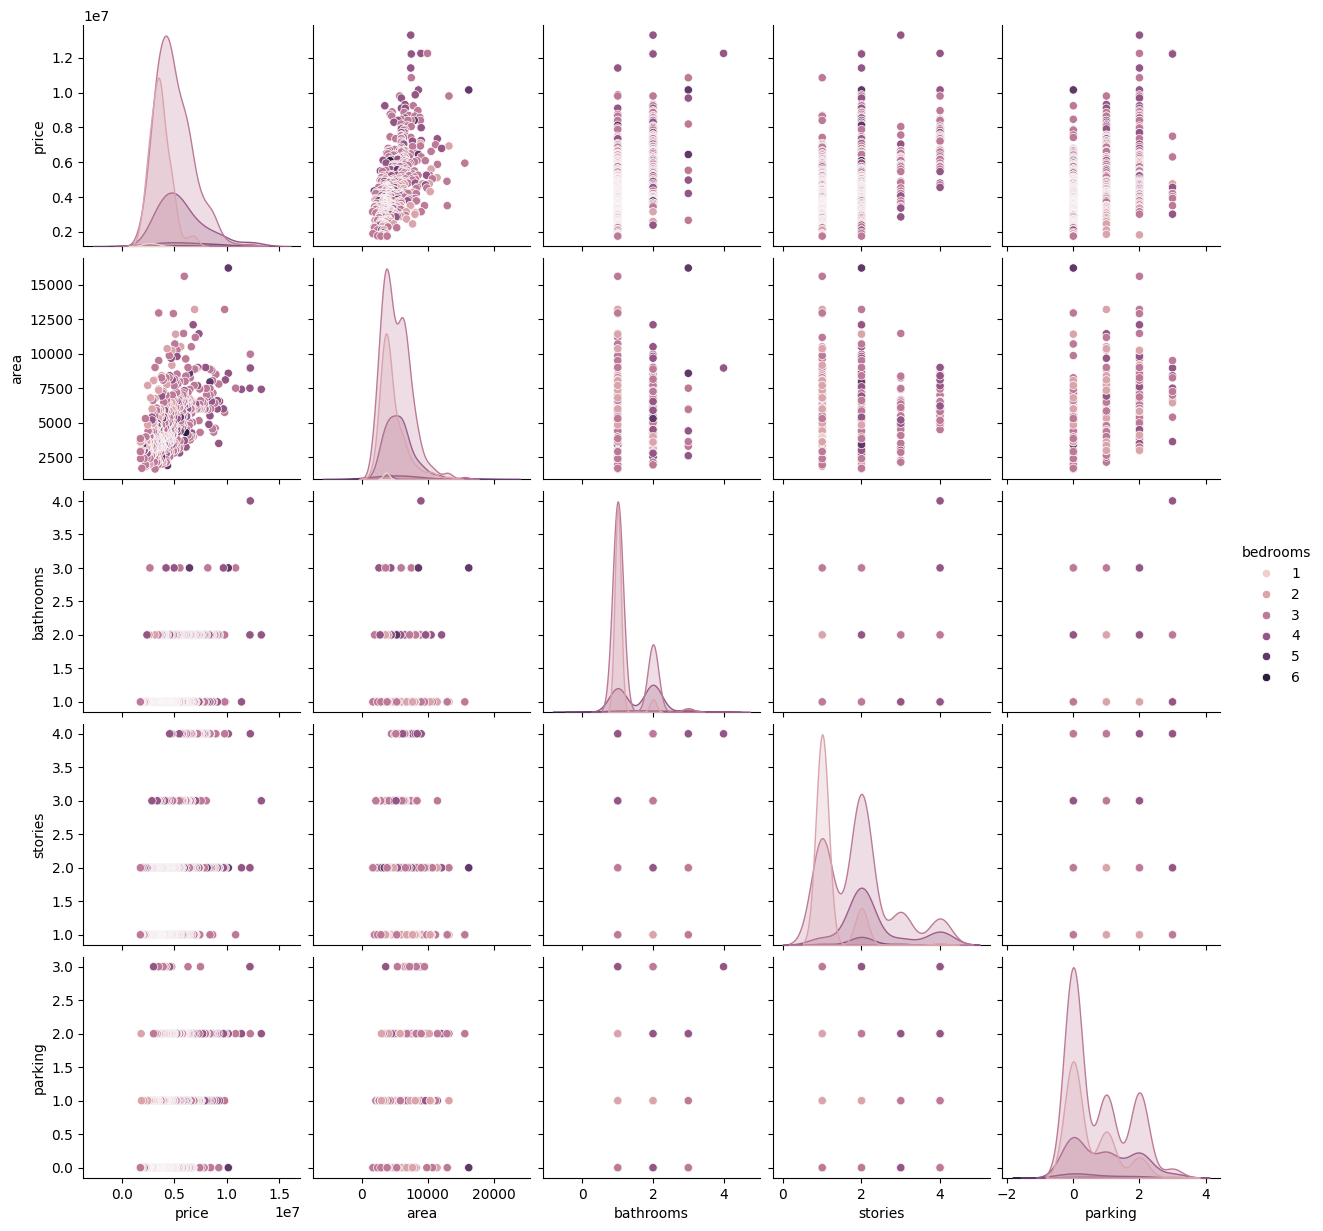

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(listings, hue='bedrooms')
plt.show()

In [ ]:
# extract the values ​​of the price (your target vector) into a new variable and display its size
target_vector = listings['price'].values
print("Taille du vecteur cible :", target_vector.size)

Taille du vecteur cible : 545


In [40]:
#drop the price column from the dataset 
listings.drop(['price','mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1)

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2
...,...,...,...,...,...
540,3000,2,1,1,2
541,2400,3,1,1,0
542,3620,2,1,1,0
543,2910,3,1,1,0


In [43]:
# Create a new DataFrame with selected columns
X = listings[['area', 'bedrooms', 'bathrooms', 'parking']]

# Print the column names of the new DataFrame
print(X.columns)

Index(['area', 'bedrooms', 'bathrooms', 'parking'], dtype='object')


In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with alpha = 0.2
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(X_train, y_train)